In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit

In [33]:
def Diffusion_Limited_Aggregation():
    #assuming p = 0.5
    L = 200
    H = 500
    t = 10000
    color = t/5
    N = t/color
    l = 1
    lattice = np.zeros(L,H)
    height = np.zeros(L)
    
    for i in range(L):
        lattice[i][0] = 1
        height[i] = 1
    c = 0    
    for i in range (int(N)):
        for j in range(int(color)):
            y_start = int(max(height)+20)
            x_start = np.random.randint(200)
            y=int(y_start)
            x=int(x_start)
            buffer_length=int(max(height)+50)
            while (1):
                horizontal = np.random.rand()
                if (horizontal <= 0.5): #assuming p = 0.5 (horizontal direction)
                    x=(x+l)%L
                    if(lattice[(x-1)%L][y]!=0 or lattice[(x+1)%L][y]!=0 or lattice[x][y-1]!=0 or lattice[x][y+1]!=0):
                        lattice[x][y]=i+1
                        for h in range(H):
                            if(lattice[x][H-1-h]!=0):
                                height[x]=H-1-h
                                break
                        break
                else:
                    x=(x-l)%L
                    if(lattice[(x-1)%L][y]!=0 or lattice[(x+1)%L][y]!=0 or lattice[x][y-1]!=0 or lattice[x][y+1]!=0):
                        lattice[x][y]=i+1
                        for h in range(H):
                            if(lattice[x][H-1-h]!=0):
                                height[x]=H-1-h
                                break
                        break
                vertical = np.random.rand()
                if (vertical<= 0.5): #assuming p = 0.5 (vertical direction)
                    y=y+l
                    if(y >= buffer_length):
                        break #we won't work with this walker anymore
                    if(lattice[(x-1)%L][y]!=0 or lattice[(x+1)%L][y]!=0 or lattice[x][y-1]!=0 or lattice[x][y+1]!=0):
                        lattice[x][y]=i+1
                        for h in range(H):
                            if(lattice[x][H-1-h]!=0):
                                height[x]=H-1-h
                                break
                        break        
                else:
                    y=y-l
                    if(y >= buffer_length):
                        break #we won't work with this walker anymore
                    if(lattice[(x-1)%L][y]!=0 or lattice[(x+1)%L][y]!=0 or lattice[x][y-1]!=0 or lattice[x][y+1]!=0):
                        lattice[x][y]=i+1
                        for h in range(H):
                            if(lattice[x][H-1-h]!=0):
                                height[x]=H-1-h
                                break
                        break
            c = c + 1            
    return lattice.transpose()       
    

In [34]:
start=timeit.default_timer()
t=10000
n=t/5
l=Diffusion_Limited_Aggregation()
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 179.80614240000432


(-0.5, 199.5, -0.5, 499.5)

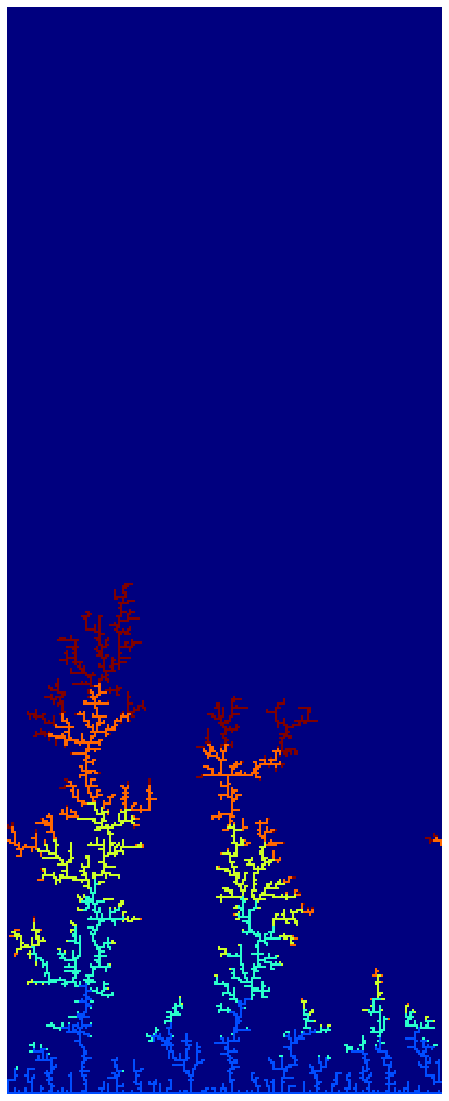

In [46]:
fig=plt.figure(figsize=(20,20))
plt.imshow(l,cmap ='jet',interpolation = 'nearest', origin = 'lower')   
#plt.axis('equal')
plt.axis('off')